In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Linear Regression with Polynomial Curve Fitting	


In [3]:
#data loading
df = pd.read_csv('globalTemp.csv')
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()
print(df,x,y,sep='\n')

     Year  Anomaly  Actual Temp
0    1880  -0.1148      13.7852
1    1881  -0.0628      13.8372
2    1882  -0.0648      13.8352
3    1883  -0.1424      13.7576
4    1884  -0.2009      13.6991
..    ...      ...          ...
132  2012   0.6240      14.5240
133  2013   0.6679      14.5679
134  2014   0.7408      14.6408
135  2015   0.8998      14.7998
136  2016   0.9363      14.8363

[137 rows x 3 columns]
[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 199

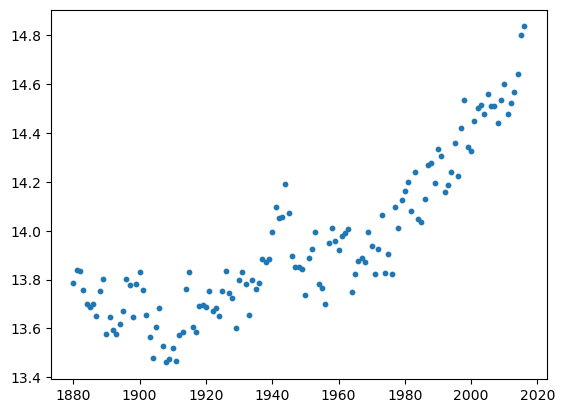

In [4]:
plt.scatter(x, y, s = 10)

In [5]:
# 用二阶多项式去拟合

order = 2 #多项式的阶数
X = np.array([x**i for i in range(order+1)]).T

In [6]:
print(X[0])
print(X.shape)

[      1    1880 3534400]
(137, 3)


Task: implement yourself linear regression using numpy

[ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]


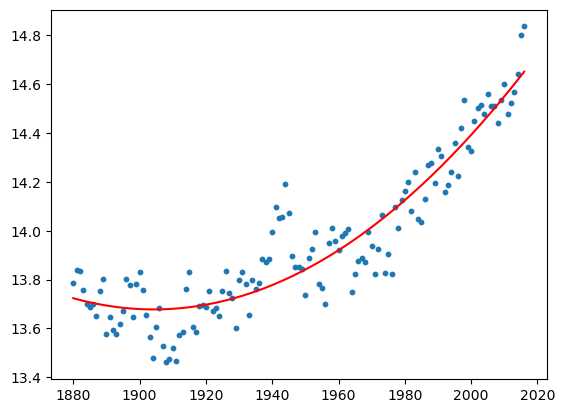

In [7]:
# W =
W = np.linalg.inv(X.T @ X) @ X.T @ y
print(W)
y_hat = X @ W
plt.scatter(x, y, s=10)
plt.plot(x, y_hat,c="r")


Task: implement linear regression using the functions from sklearn

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [8]:
# W2 =
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
W_2 = model.coef_
print(W_2)
y_hat2 = model.predict(X)

[ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]


verify your answer with codes below

In [9]:
print("our weight = ", W)
print("sklearn weight = ", W_2)

our weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]
sklearn weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]


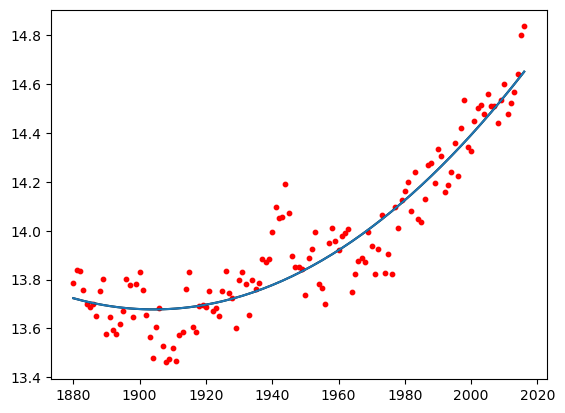

In [10]:
plt.scatter(x, y, s=10, c="r")
plt.plot(x, y_hat,c="k")
plt.plot(x, y_hat2)

## Linear Regression

In [11]:
N_SAMPLES = 500
N_FEATURES = 200
NOISE = 3
data = datasets.make_regression(n_samples=N_SAMPLES, 
                                n_features=N_FEATURES, 
                                n_informative=5, 
                                noise=NOISE, 
                                random_state=9961)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9961)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 200) (350,)
(150, 200) (150,)


Task: use numpy to implement linear regression via the normal equation, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [12]:
W1 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
# print("W1=", W1)

MSE_train = np.mean((y_train - X_train @ W1)**2)
MSE_test = np.mean((y_test - X_test @ W1)**2)
print("MSE_train=", MSE_train)
print("MSE_test=", MSE_test)

L2_norm = np.linalg.norm(W1, ord=2)
L1_norm = np.linalg.norm(W1, ord=1)
print("L2 norm of weights:", L2_norm)
print("L1 norm of weights:", L1_norm)

# MSE_train= 4.122237783344359
# MSE_test= 19.84646766601912
# L2 norm of weights: 128.11821347729773
# L1 norm of weights: 286.76099710676044

W1 shape= (200,)
MSE_train= 4.122237783344359
MSE_test= 19.84646766601912
L2 norm of weights: 128.11821347729773
L1 norm of weights: 286.76099710676044


Task: use scikit-learn’s LinearRegression to fit the same model without an intercept, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [13]:
model_sk = LinearRegression(fit_intercept=False)
model_sk.fit(X_train, y_train)
W2 = model_sk.coef_

y_train_predict = model_sk.predict(X_train)
MSE_train_sk = np.mean((y_train - y_train_predict)**2)
y_test_predict = model_sk.predict(X_test)
MSE_test_sk = np.mean((y_test - y_test_predict)**2)
print("MSE_train_sk=", MSE_train_sk)
print("MSE_test_sk=", MSE_test_sk)

L2_norm_sk = np.linalg.norm(W2, ord=2)
L1_norm_sk = np.linalg.norm(W2, ord=1)
print("L2 norm of weights_sk:", L2_norm_sk)
print("L1 norm of weights_sk:", L1_norm_sk)

MSE_train_sk= 4.1222377833443575
MSE_test_sk= 19.84646766602008
L2 norm of weights_sk: 128.11821347729773
L1 norm of weights_sk: 286.76099710676056


## Ridge Regression

Task: use numpy to implement ridge regression with various values of regularization strength via the closed-form solution, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
E = np.diag(np.ones(N_FEATURES)) # 单位阵
regularization_strength = [0, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in regularization_strength:
    W3 = np.linalg.inv(X_train.T @ X_train + alpha * E) @ X_train.T @ y_train
    
    MSE_train_ridge = np.mean((y_train - X_train @ W3)**2)
    MSE_test_ridge = np.mean((y_test - X_test @ W3)**2)

    L2_norm_ridge = np.linalg.norm(W3, ord=2)
    # L1_norm_ridge = np.linalg.norm(W3, ord=1)

    print(f"Regularization strength (alpha={alpha}):")
    print("  MSE_train_ridge=", MSE_train_ridge)
    print("  MSE_test_ridge=", MSE_test_ridge)
    print("  L2 norm of weights_ridge:", L2_norm_ridge)
    print("  L1 norm of weights_ridge:", L1_norm_ridge)

Regularization strength (alpha=0):
  MSE_train_ridge= 4.122237783344359
  MSE_test_ridge= 19.84646766601912
  L2 norm of weights_ridge: 128.11821347729773
  L1 norm of weights_ridge: 286.76099710676044
Regularization strength (alpha=0.01):
  MSE_train_ridge= 4.122268058698425
  MSE_test_ridge= 19.82530439800306
  L2 norm of weights_ridge: 128.10994183053805
  L1 norm of weights_ridge: 286.71191638349785
Regularization strength (alpha=0.1):
  MSE_train_ridge= 4.1252574230664
  MSE_test_ridge= 19.649079888630514
  L2 norm of weights_ridge: 128.03563490442258
  L1 norm of weights_ridge: 286.2768106460363
Regularization strength (alpha=1):
  MSE_train_ridge= 4.416550101328178
  MSE_test_ridge= 19.239199689271167
  L2 norm of weights_ridge: 127.30585672643782
  L1 norm of weights_ridge: 283.4916292886678
Regularization strength (alpha=10):
  MSE_train_ridge= 27.730257203220173
  MSE_test_ridge= 108.53631576358676
  L2 norm of weights_ridge: 121.0601636006893
  L1 norm of weights_ridge: 312.

Task: use scikit-learn’s Ridge to fit a ridge-regression model with various values of $\lambda$ and no intercept, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [20]:
for alpha in regularization_strength:
    ridge_model = Ridge(alpha=alpha, fit_intercept=False)
    ridge_model.fit(X_train, y_train)
    W4 = ridge_model.coef_

    MSE_train_ridge_sk = np.mean((y_train - X_train @ W4)**2)
    MSE_test_ridge_sk = np.mean((y_test - X_test @ W4)**2)

    L2_norm_ridge_sk = np.linalg.norm(W4, ord=2)
    L1_norm_ridge_sk = np.linalg.norm(W4, ord=1)
    
    print(f"Regularization strength (alpha={alpha}):")
    print("  MSE_train_ridge_sk=", MSE_train_ridge_sk)
    print("  MSE_test_ridge_sk=", MSE_test_ridge_sk)
    print("  L2 norm of weights_ridge_sk:", L2_norm_ridge_sk)
    print("  L1 norm of weights_ridge_sk:", L1_norm_ridge_sk)

Regularization strength (alpha=0):
  MSE_train_ridge_sk= 4.122237783344362
  MSE_test_ridge_sk= 19.846467666019183
  L2 norm of weights_ridge_sk: 128.11821347729776
  L1 norm of weights_ridge_sk: 286.7609971067611
Regularization strength (alpha=0.01):
  MSE_train_ridge_sk= 4.122268058698424
  MSE_test_ridge_sk= 19.825304398002963
  L2 norm of weights_ridge_sk: 128.10994183053802
  L1 norm of weights_ridge_sk: 286.71191638349757
Regularization strength (alpha=0.1):
  MSE_train_ridge_sk= 4.1252574230663965
  MSE_test_ridge_sk= 19.649079888630933
  L2 norm of weights_ridge_sk: 128.03563490442258
  L1 norm of weights_ridge_sk: 286.2768106460369
Regularization strength (alpha=1):
  MSE_train_ridge_sk= 4.416550101328172
  MSE_test_ridge_sk= 19.239199689270983
  L2 norm of weights_ridge_sk: 127.30585672643784
  L1 norm of weights_ridge_sk: 283.4916292886674
Regularization strength (alpha=10):
  MSE_train_ridge_sk= 27.730257203220212
  MSE_test_ridge_sk= 108.53631576358619
  L2 norm of weights

## Lasso

Task: use scikit-learn’s Lasso to fit a Lasso-regression model with various values of $\lambda$ and no intercept, compute the L1 norm of the learned weights, report the mean squared error on both training and test data, and count the number of non-zero weights.

In [ ]:
for alpha in regularization_strength:
    lasso_